In [3]:
# STEP 1 — Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report,
    roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
np.random.seed(42)

In [4]:
# STEP 2 — Load Dataset
df = pd.read_csv('/content/adhdata.csv', low_memory=False)
print("✅ Dataset loaded successfully.")
print("Shape:", df.shape)
display(df.head())


✅ Dataset loaded successfully.
Shape: (2166383, 21)


,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,F8,T7,T8,P7,P8,Fz,Cz,Pz,Class,ID
0,261.0,402.0,16.0,261.0,126.0,384.0,126.0,236.0,52.0,236.0,...,16.0,200.0,494.0,126.0,236.0,121.0,367.0,121.0,ADHD,v10p
1,121.0,191.0,-94.0,85.0,16.0,200.0,126.0,52.0,347.0,273.0,...,-57.0,126.0,347.0,52.0,52.0,15.0,121.0,-19.0,ADHD,v10p
2,-55.0,85.0,-204.0,15.0,-57.0,200.0,52.0,126.0,236.0,200.0,...,-94.0,126.0,420.0,52.0,126.0,-55.0,261.0,85.0,ADHD,v10p
3,191.0,85.0,52.0,50.0,89.0,236.0,163.0,89.0,89.0,89.0,...,-57.0,236.0,420.0,126.0,126.0,15.0,85.0,-55.0,ADHD,v10p
4,-55.0,-125.0,-204.0,-160.0,-204.0,16.0,-241.0,-241.0,89.0,16.0,...,-131.0,89.0,310.0,-57.0,52.0,-55.0,15.0,-336.0,ADHD,v10p


In [5]:
# STEP 3 — Encode Categorical Columns ('ID' and 'Class')
df_encoded = pd.get_dummies(df, columns=['ID', 'Class'])
print("\n✅ One-hot encoding done.")
display(df_encoded.head())


✅ One-hot encoding done.


,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,ID_v55p,ID_v56p,ID_v57p,ID_v58p,ID_v59p,ID_v60p,ID_v6p,ID_v8p,Class_ADHD,Class_Control
0,261.0,402.0,16.0,261.0,126.0,384.0,126.0,236.0,52.0,236.0,...,False,False,False,False,False,False,False,False,True,False
1,121.0,191.0,-94.0,85.0,16.0,200.0,126.0,52.0,347.0,273.0,...,False,False,False,False,False,False,False,False,True,False
2,-55.0,85.0,-204.0,15.0,-57.0,200.0,52.0,126.0,236.0,200.0,...,False,False,False,False,False,False,False,False,True,False
3,191.0,85.0,52.0,50.0,89.0,236.0,163.0,89.0,89.0,89.0,...,False,False,False,False,False,False,False,False,True,False
4,-55.0,-125.0,-204.0,-160.0,-204.0,16.0,-241.0,-241.0,89.0,16.0,...,False,False,False,False,False,False,False,False,True,False


In [6]:
# STEP 4 — Define Features (X) and Target (y)
y = df_encoded['Class_ADHD']
X = df_encoded.drop(columns=[col for col in df_encoded.columns if 'ID_' in col] +
                             ['Class_Control', 'Class_ADHD'])

print("\n✅ Feature and target defined.")
print("X shape:", X.shape)
print("y shape:", y.shape)


✅ Feature and target defined.
X shape: (2166383, 19)
y shape: (2166383,)


In [7]:
# STEP 5 — Split Data (Before Scaling ✅)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\n✅ Dataset split complete.")
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True))


✅ Dataset split complete.
Train shape: (1733106, 19) Test shape: (433277, 19)
Class distribution in training set:
Class_ADHD
True     0.557182
False    0.442818
Name: proportion, dtype: float64


In [8]:
#STEP 6 — Standardization (Fit on Train, Apply on Test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\n✅ Data scaled correctly (no data leakage).")


✅ Data scaled correctly (no data leakage).


In [9]:
# STEP 7 — Apply PCA (retain 95% variance automatically)
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

explained_var_ratio = np.cumsum(pca.explained_variance_ratio_) * 100

print("\n✅ PCA applied successfully.")
print(f"Original feature count: {X_train.shape[1]}")
print(f"Reduced feature count (PCA): {X_train_pca.shape[1]}")
print(f"Total variance retained: {explained_var_ratio[-1]:.2f}%")


✅ PCA applied successfully.
Original feature count: 19
Reduced feature count (PCA): 14
Total variance retained: 95.41%


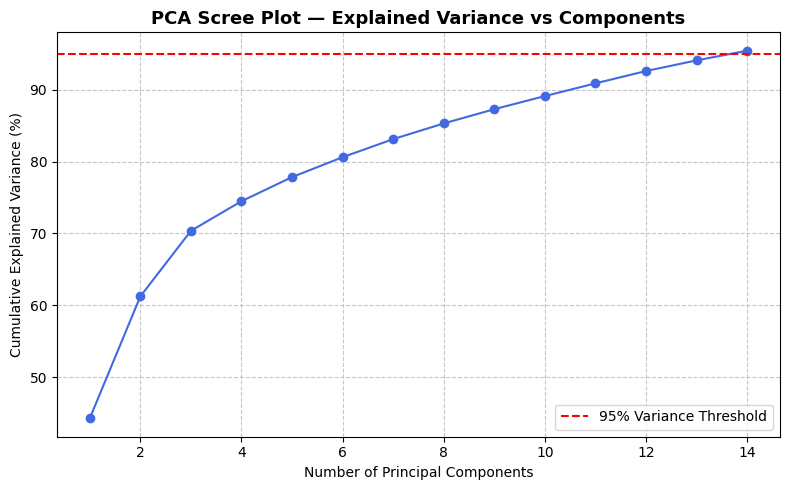

In [10]:
#STEP 7.1 — Scree Plot (Explained Variance vs Components)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var_ratio)+1), explained_var_ratio, marker='o', color='royalblue')
plt.title("PCA Scree Plot — Explained Variance vs Components", fontsize=13, weight='bold')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
# STEP 8 — Train Logistic Regression Model
log_reg = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
log_reg.fit(X_train_pca, y_train)
print("\n✅ Logistic Regression model trained successfully (with PCA 95% variance).")


✅ Logistic Regression model trained successfully (with PCA 95% variance).


In [12]:
#STEP 9 — Evaluate Model
y_pred = log_reg.predict(X_test_pca)
y_prob = log_reg.predict_proba(X_test_pca)[:, 1]

# Compute metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = auc(*roc_curve(y_test, y_prob)[:2])
cm = confusion_matrix(y_test, y_pred)

print("\n📊 Logistic Regression Results (After PCA with 95% Variance Retained)")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


📊 Logistic Regression Results (After PCA with 95% Variance Retained)
Accuracy:  0.5015
Precision: 0.5586
Recall:    0.5021
F1-score:  0.5288
ROC-AUC:   0.5011

Classification Report:
               precision    recall  f1-score   support

       False       0.44      0.50      0.47    191863
        True       0.56      0.50      0.53    241414

    accuracy                           0.50    433277
   macro avg       0.50      0.50      0.50    433277
weighted avg       0.51      0.50      0.50    433277



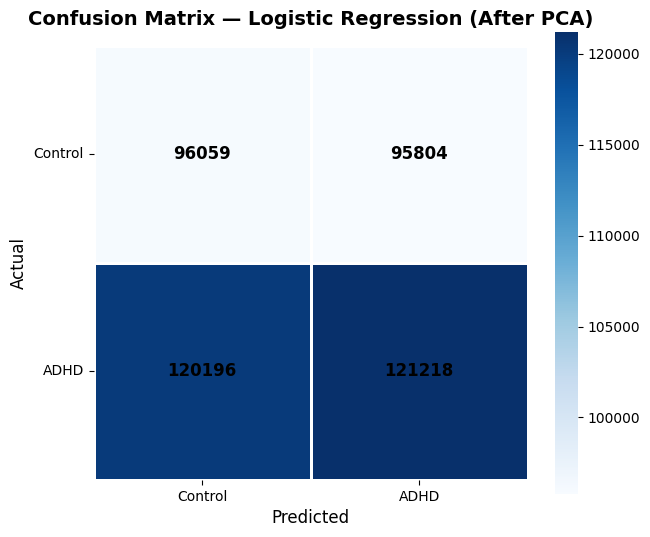

In [13]:
# STEP 10 — Confusion Matrix Heatmap
plt.figure(figsize=(7,6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues', cbar=True, square=True,
    linewidths=1, linecolor='white',
    annot_kws={"size": 12, "weight": "bold", "color": "black"}
)
plt.title("Confusion Matrix — Logistic Regression (After PCA)", fontsize=14, weight='bold', pad=15)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.xticks([0.5, 1.5], ['Control', 'ADHD'])
plt.yticks([0.5, 1.5], ['Control', 'ADHD'], rotation=0)
plt.show()

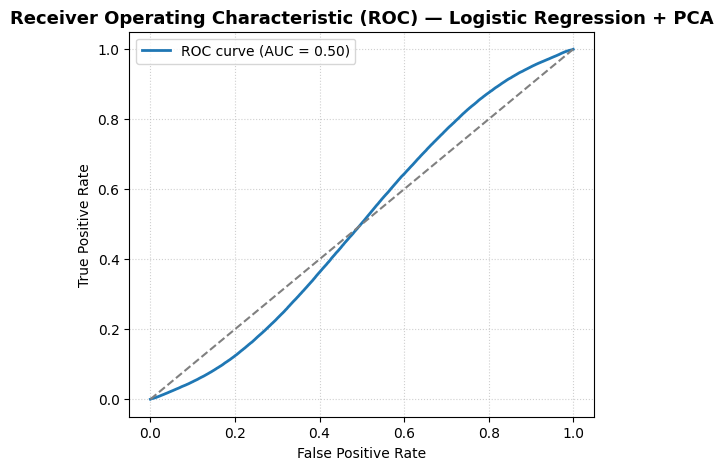

In [14]:
# STEP 11 — ROC Curve (Blue Theme)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='#1f77b4', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) — Logistic Regression + PCA", fontsize=13, weight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()